In [1]:
import numpy as np
import cv2
from PIL import Image, ImageFont, ImageDraw

In [2]:
def create_text_image(text: str,
                      font_size: int,
                      font_path:  str = 'Windows/Fonts/Arial/arial.ttf') -> np.ndarray:

    font = ImageFont.truetype(font=font_path, size=font_size, encoding='unicode')
    text_width, text_height = font.getsize(text)
    text_image = Image.new(mode='L', size=(text_width, text_height), color='white')

    draw = ImageDraw.Draw(text_image)
    draw.text(xy=(0, 0), text=text, fill='black', font=font)
    return np.array(text_image)

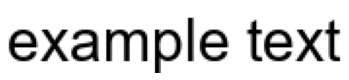

In [3]:
import matplotlib.pyplot as plt

img = create_text_image('example text', 30)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
def rotate(image: np.ndarray, angle: float, center: (int, int)) -> np.ndarray:

    height, width = image.shape[:2]
    c_x, c_y = center

    cos_a = np.cos(angle)
    sin_a = np.sin(angle)
    M = np.float32([[cos_a, sin_a, width // 2 - c_x * cos_a - c_y * sin_a],
                    [-sin_a, cos_a, height // 2 + c_x * sin_a - c_y * cos_a]])

    new_width = int(height * np.abs(sin_a) + width * cos_a)
    new_height = int(height * cos_a + width * np.abs(sin_a))

    M[0, 2] += new_width / 2 - c_x
    M[1, 2] += new_height / 2 - c_y

    white = (255, 255, 255)
    rotated_image = cv2.warpAffine(image, M, (new_width, new_height), borderValue=white)
    return rotated_image

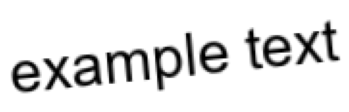

In [5]:
import matplotlib.pyplot as plt

plt.imshow(rotate(img, 0.1, (img.shape[1] // 2, img.shape[0] // 2)), cmap='gray')
plt.axis('off')
plt.show()

In [6]:
def add_pepper_noise(image: np.ndarray, amount: float) -> np.ndarray:
    
    noised_image = np.copy(image)
    H, W = image.shape[:2]

    num_pepper_pixels = int(H * W * amount)
    row_mask = np.random.randint(0, H, num_pepper_pixels)
    column_mask = np.random.randint(0, W, num_pepper_pixels)

    noised_image[row_mask, column_mask] = 0
    return noised_image

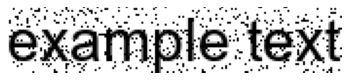

In [7]:
import matplotlib.pyplot as plt

plt.imshow(add_pepper_noise(img, 0.1), cmap='gray')
plt.axis('off')
plt.show()

In [8]:
def add_gaussian_noise(image: np.ndarray, mean: float, std: float) -> np.ndarray:
    noised_image = image + np.random.normal(mean, std, size=image.shape)
    return noised_image.clip(0, 255)

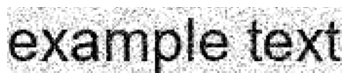

In [9]:
import matplotlib.pyplot as plt

plt.imshow(add_gaussian_noise(img, 0, 50), cmap='gray')
plt.axis('off')
plt.show()

In [10]:
def add_speckle_noise(image: np.ndarray, mean: float, std: float) -> np.ndarray:
    noised_image = image + (255 - image) * np.random.normal(mean, std, size=image.shape)
    return noised_image.clip(0, 255)

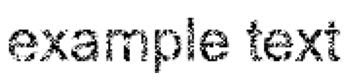

In [11]:
import matplotlib.pyplot as plt

plt.imshow(add_speckle_noise(img, 0, 1), cmap='gray')
plt.axis('off')
plt.show()